In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [3]:
myData = pd.read_csv('C:/Users/FORGE-15 I7/Downloads/Amazon_Unlocked_Mobile.csv')
myData = myData.dropna(axis=0, subset=['Reviews'])
myData

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


#### Total number of products in dataset

In [32]:
product_name = []
for item in myData["Product Name"]:
    if (item in product_name):
        continue
    else:
        product_name.append(item)

len(product_name)

4410

#### Total number of brands in dataset

In [34]:
brands = []
for item in myData["Brand Name"]:
    if (item in brands):
        continue
    else:
        brands.append(item)
        
len(brands)

385

In [17]:
## Top Reviews by Brand
brand_reviews = myData['Brand Name'].value_counts().head(10)
top_brands = brand_reviews.index[:5].tolist()
top_brands

['Samsung', 'BLU', 'Apple', 'LG', 'BlackBerry']

In [18]:
rating = myData.groupby(
    'Brand Name'
    ).Rating.agg(
        ['count', 'min', 'max', 'mean']
    ).sort_values(
        'count', ascending=False
    )
rating.head(15)

,count,min,max,mean
Brand Name,,,,
Samsung,65728,1,5,3.962680
BLU,63246,1,5,3.792224
Apple,58179,1,5,3.924543
LG,22410,1,5,3.841455
BlackBerry,16872,1,5,3.741465
Nokia,16805,1,5,3.819458
Motorola,13417,1,5,3.812849
HTC,12724,1,5,3.465420
CNPGD,12613,1,5,3.106002


In [20]:
## Reviews
Reviews = myData['Reviews']
sample_review = Reviews[:100] 
sample_review

0     I feel so LUCKY to have found this used (phone...
1     nice phone, nice up grade from my pantach revu...
2                                          Very pleased
3     It works good but it goes slow sometimes but i...
4     Great phone to replace my lost phone. The only...
                            ...                        
95                                            very well
96                        Cannot connect to GSM network
97    This cell phone exceeded my expectations, it's...
98    pros.. it works fine, its easy to use, not too...
99    I went through lots of reviews for different p...
Name: Reviews, Length: 100, dtype: object

Text(0, 0.5, 'Count')

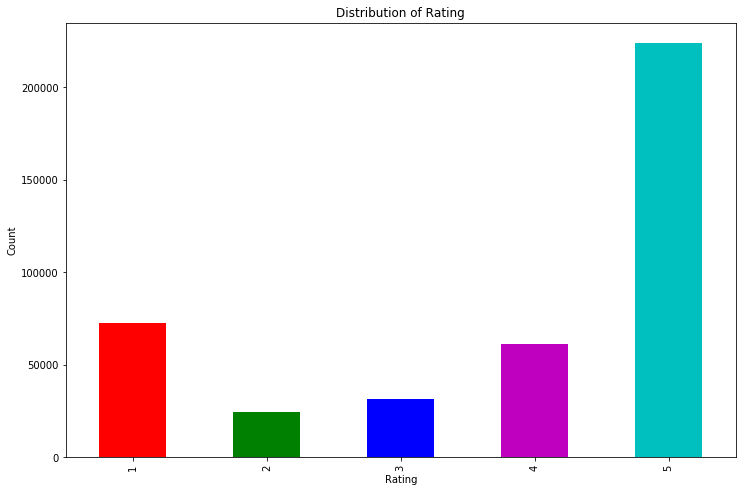

In [46]:
# Plot distribution of rating
plt.figure(figsize=(12,8))
# sns.countplot(data['Rating'])
myData['Rating'].value_counts().sort_index().plot(kind='bar',  color = list('rgbmc')) #rgbkymc
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0.5, 1.0, 'Number of Reviews for Top 20 Brands')

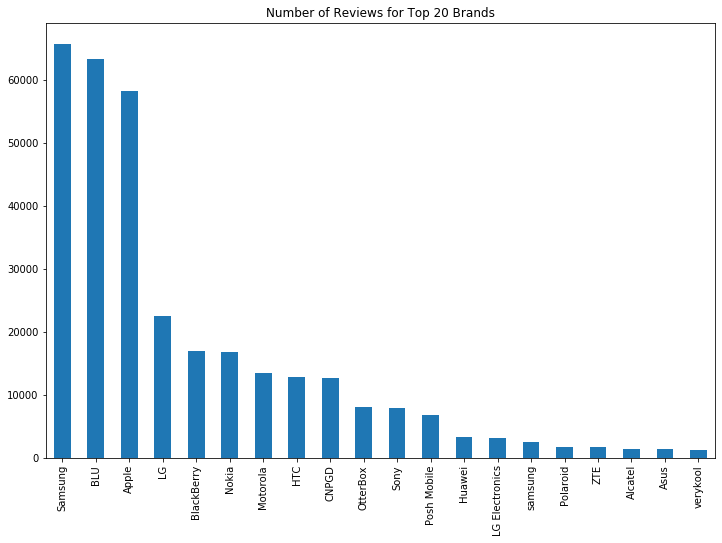

In [65]:
# Plot number of reviews for top 20 brands
brands = myData["Brand Name"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")

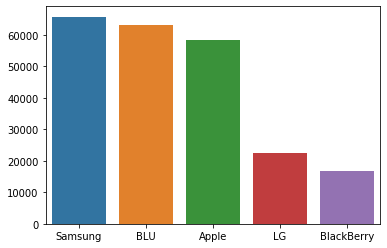

In [88]:
# Plot number of reviews for top 20 brands
brands = myData["Brand Name"].value_counts()
type(brands[:5])
sns.barplot(brands[:5].index, brands[:5].values)


Text(0.5, 1.0, 'Number of Reviews for Top 50 Products')

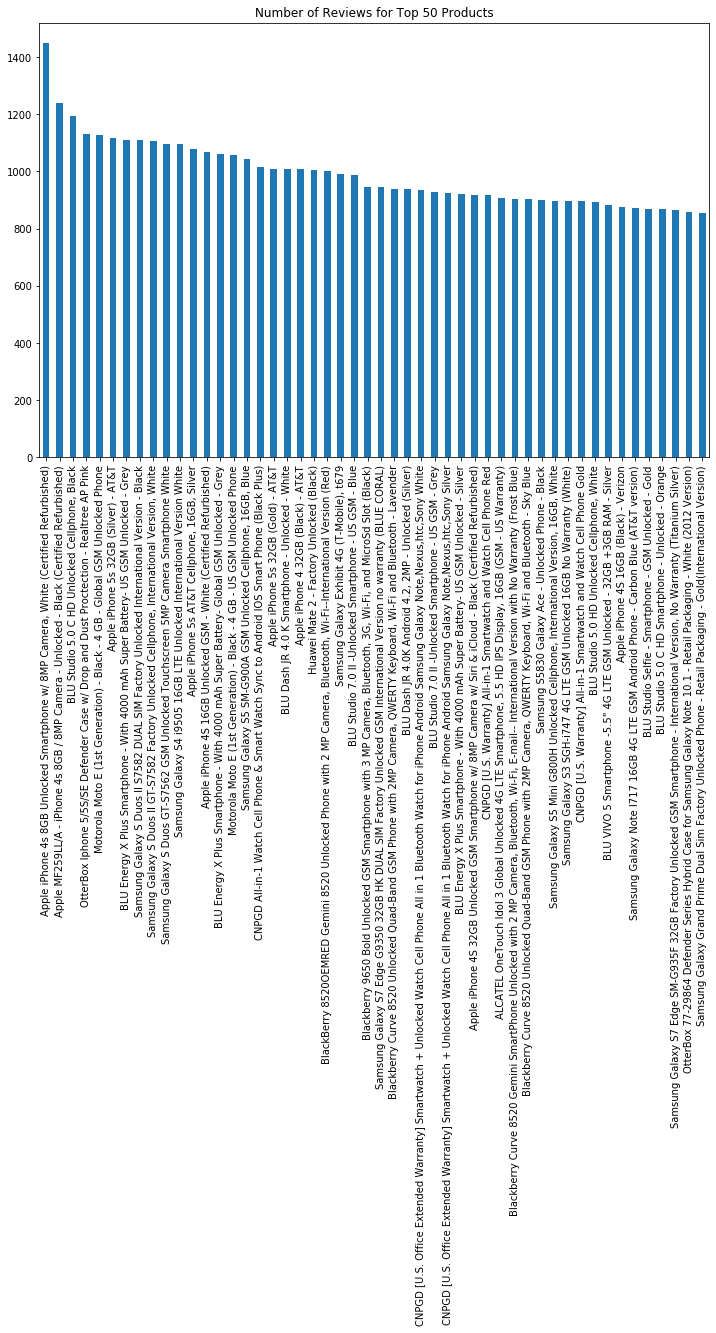

In [89]:
# Plot number of reviews for top 50 products
products = myData["Product Name"].value_counts()
plt.figure(figsize=(12,8))
products[:50].plot(kind='bar')
plt.title("Number of Reviews for Top 50 Products")

[Text(0, 0, 'Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)'),
 Text(0, 0, 'Apple MF259LL/A - iPhone 4s 8GB / 8MP Camera - Unlocked - Black (Certified Refurbished)'),
 Text(0, 0, 'BLU Studio 5.0 C HD Unlocked Cellphone, Black'),
 Text(0, 0, 'OtterBox Iphone 5/5S/SE Defender Case w/ Drop and Dust Proctection - Realtree AP Pink'),
 Text(0, 0, 'Motorola Moto E (1st Generation) - Black - 4 GB - Global GSM Unlocked Phone'),
 Text(0, 0, 'Apple iPhone 5s 32GB (Silver) - AT&T'),
 Text(0, 0, 'BLU Energy X Plus Smartphone - With 4000 mAh Super Battery- US GSM Unlocked - Grey'),
 Text(0, 0, 'Samsung Galaxy S Duos II S7582 DUAL SIM Factory Unlocked International Version - Black'),
 Text(0, 0, 'Samsung Galaxy S Duos II GT-S7582 Factory Unlocked Cellphone, International Version, White'),
 Text(0, 0, 'Samsung Galaxy S Duos GT-S7562 GSM Unlocked Touchscreen 5MP Camera Smartphone White'),
 Text(0, 0, 'Samsung Galaxy S4 i9505 16GB LTE Unlocked International Version 

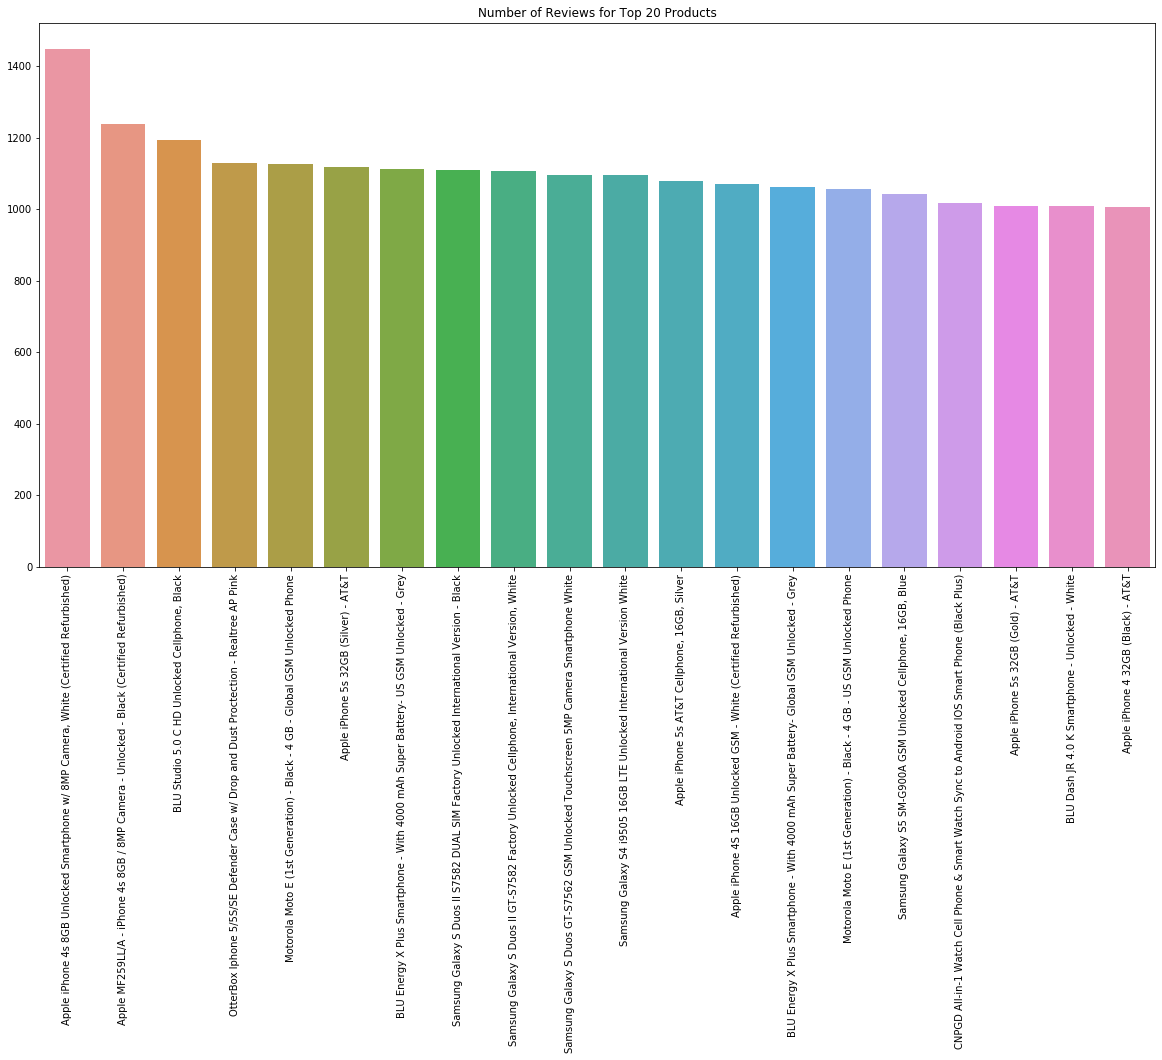

In [106]:
# Plot number of reviews for top 50 products
products = myData["Product Name"].value_counts()
plt.figure(figsize=(20,10))
plt.title("Number of Reviews for Top 20 Products")
ax = sns.barplot(products[:20].index, products[:20].values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### Data Cleaning and Text Preprocessing/Analysis

In [33]:
# Step 1: Preprocess review text
# 1.1 Define preprocess function
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
#from nltk import stopwords
import re
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')

import string
stop = set(stopwords.words('english'))
punc = set(string.punctuation)
keywords = myData["Reviews"].apply(lambda x: x.lower()).unique().tolist()
keywords.append("phone")
lemma = WordNetLemmatizer()
def clean_text(text):
    # Convert the text into lowercase
    text = text.lower()
    # Split into list
    wordList = text.split()
    # Remove punctuation
    wordList = ["".join(x for x in word if (x=="'")|(x not in punc)) for word in wordList]
    # Remove stopwords
    wordList = [word for word in wordList if word not in stop]
    # Remove other keywords
    wordList = [word for word in wordList if word not in keywords]
    # Lemmatisation
    wordList = [lemma.lemmatize(word) for word in wordList]
    return " ".join(wordList)
clean_text("I love reading books.")

'reading book'

In [41]:
mystopwords = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]

In [42]:
def datapreprocessing(review):
    
    # Convert the text into lowercase
    review = review.lower()
    
    # Remove punctuation
    review = remove_punct(review)
    
    # Tokenization
    review = word_tokenize(review)
    
    # Remove stopwords
    review = remove_stopwords(review)
    
    return review

In [43]:
sample = myData['Reviews'][:10]
sample

0    I feel so LUCKY to have found this used (phone...
1    nice phone, nice up grade from my pantach revu...
2                                         Very pleased
3    It works good but it goes slow sometimes but i...
4    Great phone to replace my lost phone. The only...
5    I already had a phone with problems... I know ...
6    The charging port was loose. I got that solder...
7    Phone looks good but wouldn't stay charged, ha...
8    I originally was using the Samsung S2 Galaxy f...
9    It's battery life is great. It's very responsi...
Name: Reviews, dtype: object

In [46]:
sample = sample.apply(lambda x: stemming(x))
sample

0    [feel, lucki, found, use, phone, us, use, hard...
1    [nice, phone, nice, grade, pantach, revu, clea...
2                                              [pleas]
3    [work, good, goe, slow, sometim, good, phone, ...
4    [great, phone, replac, lost, phone, thing, vol...
5    [alreadi, phone, problem, know, state, use, da...
6    [charg, port, loos, got, solder, need, new, ba...
7    [phone, look, good, wouldnt, stay, charg, buy,...
8    [origin, use, samsung, galaxi, sprint, want, r...
9    [batteri, life, great, respons, touch, issu, s...
Name: Reviews, dtype: object

In [45]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

import string

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text



##stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in mystopwords]
    return text

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def tokenize(msg):
    word_tokens = word_tokenize(msg)
    return word_tokens

ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

In [18]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

0    feel lucky found used u  used hard line someon...
1    grade pantach revue set easy set android say l...
2                                                     
3                                         go sometimes
4    replace thing volume button work still setting...
5    already know stated used dang state charge wis...
6    charging port loose got soldered needed new 10...
7    look stay charged buy new still stay charged l...
8    originally using samsung s2 galaxy sprint want...
9    life responsive touch issue sometimes screen g...
Name: Reviews, dtype: object

In [219]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

In [4]:
new = remove_stopwords(myData['Reviews'][:10])
new

NameError: name 'remove_stopwords' is not defined

In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def tokenize(msg):
    word_tokens = word_tokenize(msg)
    return word_tokens

def remove_punction_and_stopwords(msg):
   stop_words = set(stopwords.words('english'))
   word_tokens = word_tokenize(msg.lower())
   #print(word_tokens)
   filtered_words = [w for w in msg if w not in word_tokens]
   print(filtered_words)
   new_sentence = ''.join(filtered_words)
   return new_sentence

In [297]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import numpy
import re
from bs4 import BeautifulSoup
stop=set(stopwords.words('english'))
snow = nltk.stem.SnowballStemmer('english')
stop
def decontracted(phrase):
    phrase=re.sub(r"won't","will not",phrase)
    phrase=re.sub(r"can't","can not",phrase)
    phrase=re.sub(r"n\'t","not",phrase)
    phrase=re.sub(r"\'re","are",phrase)
    phrase=re.sub(r"\'s","is",phrase)
    phrase=re.sub(r"\'d","would",phrase)
    phrase=re.sub(r"\'ll","will",phrase)    
    phrase=re.sub(r"\'t","not",sentence)
    phrase=re.sub(r"\'ve","have",sentence)
    phrase=re.sub(r"\'m","am",sentence)
    return phrase
preprocessed_reviews=[]
for sentence in myData['Reviews'][:10].values:
    sentence=re.sub(r"http\S+"," ",sentence)
    sentence=BeautifulSoup(sentence,'lxml').get_text()
    cleanr=re.compile('<.*?>')
    sentence=re.sub(cleanr,' ',sentence)
    sentence=decontracted(sentence)
    sentence=re.sub("\S\*\d\S*"," ",sentence)
    sentence=re.sub("[^A-Za-z]+"," ",sentence)
    sentence=re.sub(r'[?|!|\'|"|#]',r' ',sentence)
    sentence=re.sub(r'[.|,|)|(|\|/]',r' ',sentence)
    sentence='  '.join(snow.stem(e.lower()) for e in sentence.split() if e.lower() not in stop)
    preprocessed_reviews.append(sentence.strip())

In [299]:
preprocessed_reviews

['feel  lucki  found  use  phone  us  use  hard  phone  line  someon  upgrad  sold  one  son  like  old  one  final  fell  apart  year  want  upgrad  thank  seller  realli  appreci  honesti  said  use  phone  recommend  seller  high  would',
 'nice  phone  nice  grade  pantach  revu  clean  set  easi  set  never  android  phone  fantast  say  least  perfect  size  surf  social  media  great  phone  samsung',
 'pleas',
 'work  good  goe  slow  sometim  good  phone  love',
 'great  phone  replac  lost  phone  thing  volum  button  work  still  go  set  adjust  job  elig  upgrad  phone  thaank',
 'alreadi  phone  problem  know  state  use  dang  state  charg  wish  would  read  comment  would  purchas  item  crack  side  damag  good  tri  charg  anoth  way  work  request  money  back  get  money  back  sign  unhappi  custom',
 'charg  port  loos  got  solder  need  new  batteri  well  later  includ  cost  purchas  usabl  phone  phone  sold  state',
 'phone  look  good  stay  charg  buy  n

In [9]:
Reviews = myData['Reviews'][:10].apply(lambda x: remove_stopwords(x))
Reviews

NameError: name 'remove_stopwords' is not defined

### NLTK function to find sentiment value and sentiment

In [111]:
## Reviews
Reviews = myData['Reviews']
sample_review = Reviews[:100] 

In [112]:
sentiment = SentimentIntensityAnalyzer()

polarity = []
for sentences in sample_review:
    # print(sentences)   
    ss = sentiment.polarity_scores(sentences)
    # for k in sorted(ss):
        # print('{0}: {1}, '.format(k, ss[k]))
 
    if ss['compound'] >= 0.05 : 
        # print("Positive") 
        polarity.append("1")
        
    elif ss['compound'] <= -0.05 : 
        # print("Negative") 
        polarity.append("-1")
    else : 
        # print("Neutral") 
        polarity.append("0")

review_polarity = [(i, polarity.count(i)) for i in set(polarity)]
print(review_polarity)

[('0', 12), ('1', 71), ('-1', 17)]


In [120]:
# Create new DF
polarity = pd.DataFrame(data=polarity, columns=["Polarity"])

polarity.reset_index(drop=True, inplace=True)
myData.reset_index(drop=True, inplace=True)
newDF = pd.concat([myData, polarity], axis=1)   #Add category column

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Polarity
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1
...,...,...,...,...,...,...,...
95,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,5,very well,0.0,1
96,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,1,Cannot connect to GSM network,0.0,0
97,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,4,"This cell phone exceeded my expectations, it's...",1.0,1
98,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,4,"pros.. it works fine, its easy to use, not too...",1.0,1


In [121]:
newDF = newDF.head(100)
newDF

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Polarity
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1
...,...,...,...,...,...,...,...
95,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,5,very well,0.0,1
96,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,1,Cannot connect to GSM network,0.0,0
97,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,4,"This cell phone exceeded my expectations, it's...",1.0,1
98,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,4,"pros.. it works fine, its easy to use, not too...",1.0,1


In [176]:
x_train, x_test, y_train, y_test = train_test_split(
    newDF.Reviews, newDF.Polarity, random_state=0, test)
x_train.isnull().sum()

0

In [172]:
# Vectorize X_train
vectorizer = CountVectorizer(min_df=5).fit(x_train)
X_train = vectorizer.transform(x_train)
print("X_train:\n{}".format(repr(X_train)))

feature_names = vectorizer.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

X_train:
<80x96 sparse matrix of type '<class 'numpy.int64'>'
	with 1048 stored elements in Compressed Sparse Row format>
Number of features: 96
Mean cross-validation accuracy: 0.774


C:\Users\FORGE-15 I7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\FORGE-15 I7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [173]:
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)

X_test = vectorizer.transform(x_test)

log_y_pred = logreg.predict(X_test)

logreg_score = accuracy_score(y_test, log_y_pred)
print("Accuracy:   {:.3f}".format(logreg_score))

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Accuracy:   0.750
Training set score: 0.775
Test set score: 0.750


In [174]:
log_cfm = confusion_matrix(y_test, log_y_pred)
print("Confusion matrix:")
print(log_cfm, end='\n\n')
print('-'*15)
print(np.array([['TN', 'FP'],[ 'FN' , 'TP']]))


Confusion matrix:
[[ 0  0  2]
 [ 0  0  3]
 [ 0  0 15]]

---------------
[['TN' 'FP']
 ['FN' 'TP']]


Logistic Reg - F1 score: 0.286


C:\Users\FORGE-15 I7\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


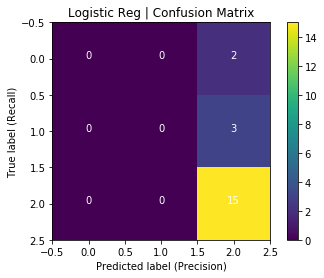

In [175]:

plt.imshow(log_cfm, interpolation='nearest')

for i, j in itertools.product(range(log_cfm.shape[0]), range(log_cfm.shape[1])):
    plt.text(j, i, log_cfm[i, j],
             horizontalalignment="center",
             color="white")

plt.ylabel('True label (Recall)')
plt.xlabel('Predicted label (Precision)')
plt.title('Logistic Reg | Confusion Matrix')
plt.colorbar();

log_f1 = f1_score(y_test, log_y_pred, average='macro')
print("Logistic Reg - F1 score: {:.3f}".format(log_f1))

In [132]:
testing2 = pd.pivot_table(newDF,index=['Brand Name'],values=['Rating', 'Review Votes','Polarity'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing2 = testing2.sort_values(by=('sum', 'Rating'), ascending = False)
testing2.head(10)

sum                   mean             
           Rating Review Votes    Rating Review Votes
Brand Name                                           
Nokia         266           96  4.222222     1.523810
Samsung       137           32  3.702703     0.864865

In [133]:
testing2 = pd.pivot_table(newDF,index=['Brand Name'],values=['Rating', 'Review Votes'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing2 = testing2.sort_values(by=('sum', 'Rating'), ascending = False)
testing2.head(10)

sum                   mean             
           Rating Review Votes    Rating Review Votes
Brand Name                                           
Nokia         266           96  4.222222     1.523810
Samsung       137           32  3.702703     0.864865

In [143]:
from tqdm.notebook import tqdm
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize

filepath = 'C:/Users/FORGE-15 I7/OneDrive - AsiaPay Limited/Sem 2/Project/Dataset/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
# emolex_df.head(12)

emolex_df.emotion.unique()
emolex_df.emotion.value_counts()

emolex_words = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_words

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,abandonment,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0
2,abate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,abatement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,abba,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14173,zone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14174,zoo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14175,zoological,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14176,zoology,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
new_df = pd.DataFrame(data=Reviews.head(100))
new_df

,Reviews
0,I feel so LUCKY to have found this used (phone...
1,"nice phone, nice up grade from my pantach revu..."
2,Very pleased
3,It works good but it goes slow sometimes but i...
4,Great phone to replace my lost phone. The only...
...,...
95,very well
96,Cannot connect to GSM network
97,"This cell phone exceeded my expectations, it's..."
98,"pros.. it works fine, its easy to use, not too..."


In [148]:
emolex_df = pd.read_csv(filepath,
                            names=["word", "emotion", "association"],
                            sep='\t')
emolex_df

,word,emotion,association
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0
...,...,...,...
141815,zoom,negative,0
141816,zoom,positive,0
141817,zoom,sadness,0
141818,zoom,surprise,0


In [149]:
emolex_words = emolex_df.pivot(index='word',
                                   columns='emotion',
                                   values='association').reset_index()
emolex_words

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,NaN,0,0,0,0,0,0,0,0,0,0
1,aback,0,0,0,0,0,0,0,0,0,0
2,abacus,0,0,0,0,0,0,0,0,0,1
3,abandon,0,0,0,1,0,1,0,1,0,0
4,abandoned,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
14177,zone,0,0,0,0,0,0,0,0,0,0
14178,zoo,0,0,0,0,0,0,0,0,0,0
14179,zoological,0,0,0,0,0,0,0,0,0,0
14180,zoology,0,0,0,0,0,0,0,0,0,0


In [150]:
emotions = emolex_words.columns.drop('word')
emotions

Index(['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
       'positive', 'sadness', 'surprise', 'trust'],
      dtype='object', name='emotion')

In [152]:
emo_df = pd.DataFrame(0, index=new_df.index, columns=emotions)
emo_df

emotion,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0


In [163]:
stemmer = SnowballStemmer("english")

with tqdm(total=len(list(new_df.iterrows()))) as pbar:
        for i, row in new_df.iterrows():
            pbar.update(1)
            document = word_tokenize(new_df.loc[i]['Reviews'])
            for word in document:
                word = stemmer.stem(word.lower())
                emo_score = emolex_words[emolex_words.word == word]
                print(emo_score)
                if not emo_score.empty:
                    for emotion in list(emotions):
                        emo_df.at[i, emotion] += emo_score[emotion]

new_df = pd.concat([new_df, emolex_df], axis=1)


Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
4818     feel      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
4818           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
5174     found      0             0        0   

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion word  anger  anticipation  disgust  fear  joy  negative  positive  \
11262    set      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
11262          0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []

Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
1716     call      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
1716           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trus

emotion    word  anger  anticipation  disgust  fear  joy  negative  positive  \
10370    refund      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
10370          0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
9256     phone      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
9256           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Colu

Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, posi

1544           0         0      0  
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
975      back      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
975            0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
9256     ph

Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, posi

Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
7141     land      0             0        0     0    0         0         1   

emotion  sadness  surprise  trust  
7141           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
11502    size      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
11502          0         0      0  
Empty DataFrame


Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
9256     phone      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
9256           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, tr

Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
4316     enjoy      0             1        0     0    1         0         1   

emotion  sadness  surprise  trust  
4316           0         0      1  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, tr

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion    word  anger  anticipation  disgust  fear  joy  negative  positive  \
7401     listen      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
7401           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Ind

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
11970    start      0             1        0     0    0         0         0   

emotion  sadness  surprise  trust  
11970          0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadn

Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion word  anger  anticipation  disgust  fear  joy  negative  positive  \
11726    son      0 

859            0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
9256     phone      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
9256           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
7446     l

Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion      word  anger  anticipation  disgust  fear  joy  negative  \
8568     occasion      0             0        0     0    0         0   

emotion  positive  sadness  surprise  trust  
8568            0        0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surpri

Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
9256     phone      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
9256           0     

emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
2328     color      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
2328           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index

Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
9361     plan      0             1        0     0    0         0         0   

emotion  sadness  surprise  trust  
9361           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
12713    thing      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
12713          0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFram

11557          0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
11610    small      0             0        0     0    0         1         0   

emotion  sadness  surprise  trust  
11610          0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
5274     full      0             0        0     0    0         0         1   

emotion  sadness  surprise  trust  
5274           0        

Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
14066    work      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
14066          0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trus

Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, posi

emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
7515     lower      0             0        0     0    0         1         0   

emotion  sadness  surprise  trust  
7515           1         0      0  
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
2832     cost      0             0        0     0    0         0         0   

emotion  sadness  surprise  trust  
2832           0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion  word  anger  anticipation  disgust  fear  joy  negative  positive  \
5528     good      0             1        0     0    1         0         1 

emotion      word  anger  anticipation  disgust  fear  joy  negative  \
5282     function      0             0        0     0    0         0   

emotion  positive  sadness  surprise  trust  
5282            0        0         0      0  
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
Empty DataFrame
Columns: [word, anger, anticipation, disgust, fear, joy, negative, positive, sadness, surprise, trust]
Index: []
emotion   word  anger  anticipation  disgust  fear  joy  negative  positive  \
9256     phone      0             0    

In [161]:
def text_emotion(df, column):
    '''
    Takes a DataFrame and a specified column of text and adds 10 columns to the
    DataFrame for each of the 10 emotions in the NRC Emotion Lexicon, with each
    column containing the value of the text in that emotions
    INPUT: DataFrame, string
    OUTPUT: the original DataFrame with ten new columns
    '''

    new_df = df.copy()

    filepath = 'C:/Users/FORGE-15 I7/OneDrive - AsiaPay Limited/Sem 2/Project/Dataset/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'
    emolex_df = pd.read_csv(filepath,
                            names=["word", "emotion", "association"],
                            sep='\t')
    emolex_words = emolex_df.pivot(index='word',
                                   columns='emotion',
                                   values='association').reset_index()
    emotions = emolex_words.columns.drop('word')
    emo_df = pd.DataFrame(0, index=df.index, columns=emotions)

    stemmer = SnowballStemmer("english")

    
    book = ''
    chapter = ''
    
    with tqdm(total=len(list(new_df.iterrows()))) as pbar:
        for i, row in new_df.iterrows():
            pbar.update(1)
            document = word_tokenize(new_df.loc[i][column])
            for word in document:
                word = stemmer.stem(word.lower())
                emo_score = emolex_words[emolex_words.word == word]
                if not emo_score.empty:
                    for emotion in list(emotions):
                        emo_df.at[i, emotion] += emo_score[emotion]

    new_df = pd.concat([new_df, emo_df], axis=1)

    return new_df


In [162]:
hp_df = text_emotion(new_df, 'Reviews')
hp_df

,Reviews,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,I feel so LUCKY to have found this used (phone...,0,0,0,0,1,1,2,1,0,2
1,"nice phone, nice up grade from my pantach revu...",0,1,0,0,2,0,2,0,0,2
2,Very pleased,0,0,0,0,0,0,0,0,0,0
3,It works good but it goes slow sometimes but i...,0,2,0,0,3,0,3,0,2,2
4,Great phone to replace my lost phone. The only...,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,very well,0,0,0,0,0,0,0,0,0,0
96,Cannot connect to GSM network,0,1,0,0,0,0,0,0,0,0
97,"This cell phone exceeded my expectations, it's...",0,2,0,0,2,1,3,0,1,2
98,"pros.. it works fine, its easy to use, not too...",0,0,0,0,0,0,0,0,0,0
